# Z-unlock Challenge: Data Visualization

## We will Analyze the correlation of temperatures changes on energy use, land cover,waste use and deforestoration by questioning these questions.
* What are the areas with biggest/smallest change in temperature?
* Are there any correlations between the hottest changes and other phenomena (like land coverage, land fires, CO2 emissions etc.)
* How does the seasonal temperature change look like?
* How does this vary by continent? Particularly South America?

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/z-unlocked-challenge-1-data-visualization/waste_disposal_data_11-29-2021.csv
/kaggle/input/z-unlocked-challenge-1-data-visualization/land_cover_data_11-30-2021.csv
/kaggle/input/z-unlocked-challenge-1-data-visualization/temperature_change_data_11-29-2021.csv
/kaggle/input/z-unlocked-challenge-1-data-visualization/energy_use_data_11-29-2021.csv
/kaggle/input/z-unlocked-challenge-1-data-visualization/fires_data_11-29-2021.csv


In [2]:
# Import Library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_temperature = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/temperature_change_data_11-29-2021.csv")
df_temperature.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data


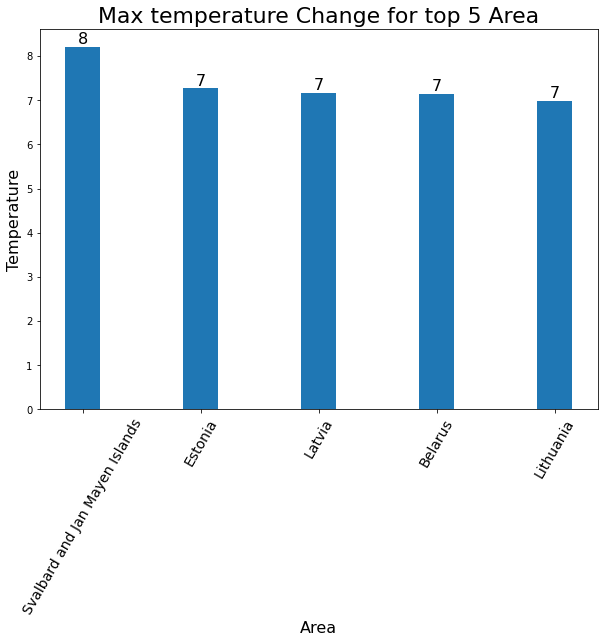

In [4]:
temp_max = df_temperature.groupby("Area")["Value"].max().sort_values(ascending=False).reset_index()
temp_min = df_temperature.groupby("Area")["Value"].min().sort_values().reset_index()

d2 = temp_max[:5]
plt.figure(figsize=(10, 7))
plt.bar(d2['Area'], d2['Value'], width=0.3)
for i, val in enumerate(d2['Value'].values):
    plt.text(i, val, round(float(val)), horizontalalignment='center', 
             verticalalignment='bottom', fontdict={'fontweight':500, 'size': 16})
    
plt.gca().set_xticklabels(d2['Area'], fontdict={'size': 14},rotation=60)
plt.title("Max temperature Change for top 5 Area", fontsize=22)
plt.ylabel("Temperature", fontsize=16)
plt.xlabel("Area", fontsize=16)
plt.show()


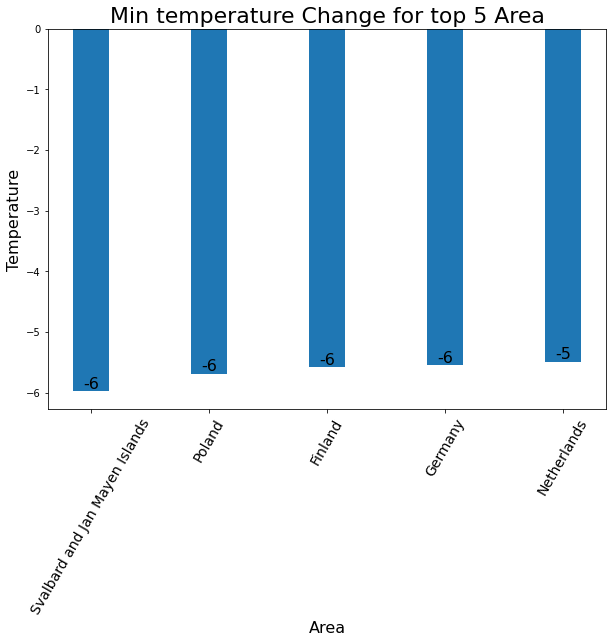

In [5]:
d2 = temp_min[:5]
plt.figure(figsize=(10, 7))
plt.bar(d2['Area'], d2['Value'], width=0.3)
for i, val in enumerate(d2['Value'].values):
    plt.text(i, val, round(float(val)), horizontalalignment='center', 
             verticalalignment='bottom', fontdict={'fontweight':500, 'size': 16})
    
plt.gca().set_xticklabels(d2['Area'], fontdict={'size': 14},rotation=60)
plt.title("Min temperature Change for top 5 Area", fontsize=22)
plt.ylabel("Temperature", fontsize=16)
plt.xlabel("Area", fontsize=16)
plt.show()


## Biggest/smallest change in temperature:
- Svalbard and Jan Mayeb Island is the most change in temperature based on the chart above

## Are there any correlations between the hottest changes and other phenomena (like land coverage, land fires, CO2 emissions etc.)
- Look at all the possibilities from another dataset/tables

In [6]:
#Look out the energy_use_data_11-29-2021 table
energy_df = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/energy_use_data_11-29-2021.csv")
energy_df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1990,1990,kilotonnes,231.4918,F,FAO estimate
1,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1991,1991,kilotonnes,188.5317,F,FAO estimate
2,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1992,1992,kilotonnes,47.9904,F,FAO estimate
3,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1993,1993,kilotonnes,38.6116,F,FAO estimate
4,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1994,1994,kilotonnes,31.4465,F,FAO estimate


In [7]:
#Look out the land_cover_data_11-30-2021 table
land_df = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/land_cover_data_11-30-2021.csv")
land_df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2001,2001,1000 ha,88.1603,FC,Calculated data
1,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2002,2002,1000 ha,88.1818,FC,Calculated data
2,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2003,2003,1000 ha,88.2247,FC,Calculated data
3,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2004,2004,1000 ha,88.2462,FC,Calculated data
4,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2005,2005,1000 ha,88.3106,FC,Calculated data


In [8]:
#Look out the energy_use_data_11-29-2021 table
energy_df = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/energy_use_data_11-29-2021.csv")
energy_df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1990,1990,kilotonnes,231.4918,F,FAO estimate
1,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1991,1991,kilotonnes,188.5317,F,FAO estimate
2,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1992,1992,kilotonnes,47.9904,F,FAO estimate
3,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1993,1993,kilotonnes,38.6116,F,FAO estimate
4,GN,Energy Use,AFG,Afghanistan,7273,Emissions (CO2),6801,Gas-Diesel oil,1994,1994,kilotonnes,31.4465,F,FAO estimate


In [9]:
df_temperature.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data


In [10]:
#Look out the waste_disposal_data_11-29-2021 table
waste_df = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/waste_disposal_data_11-29-2021.csv")
waste_df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1990,1990,kilotonnes,0.0,Fc,Calculated data
1,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1991,1991,kilotonnes,0.0,Fc,Calculated data
2,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1992,1992,kilotonnes,0.0,Fc,Calculated data
3,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1993,1993,kilotonnes,0.0,Fc,Calculated data
4,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1994,1994,kilotonnes,0.0,Fc,Calculated data


In [11]:
#Look out the fires_data_11-29-2021 table
fires_df = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/fires_data_11-29-2021.csv")
fires_df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
1,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
2,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
3,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
4,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN


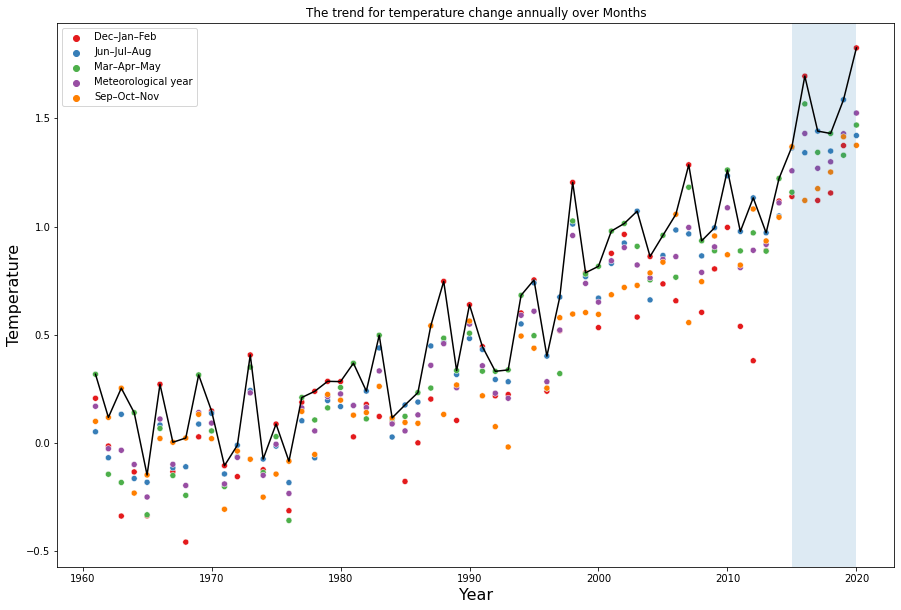

In [12]:
# Check the trend for temperature change yearly
temp_change= df_temperature.groupby(["Year","Months"])["Value"].mean().reset_index()
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Value',
                     hue='Months',
                     legend='full',
                     data=temp_change,
                     palette=sns.color_palette("Set1", n_colors=len(temp_change.Months.unique())))
max_value_per_year = temp_change.groupby('Year')['Value'].max()
sns.lineplot(data=max_value_per_year,
             ax=ax.axes,
             color='black')
plt.ylabel("Temperature", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.title("The trend for temperature change annually over Months")
plt.axvspan(2015, 2020,alpha=0.15) 
plt.show()

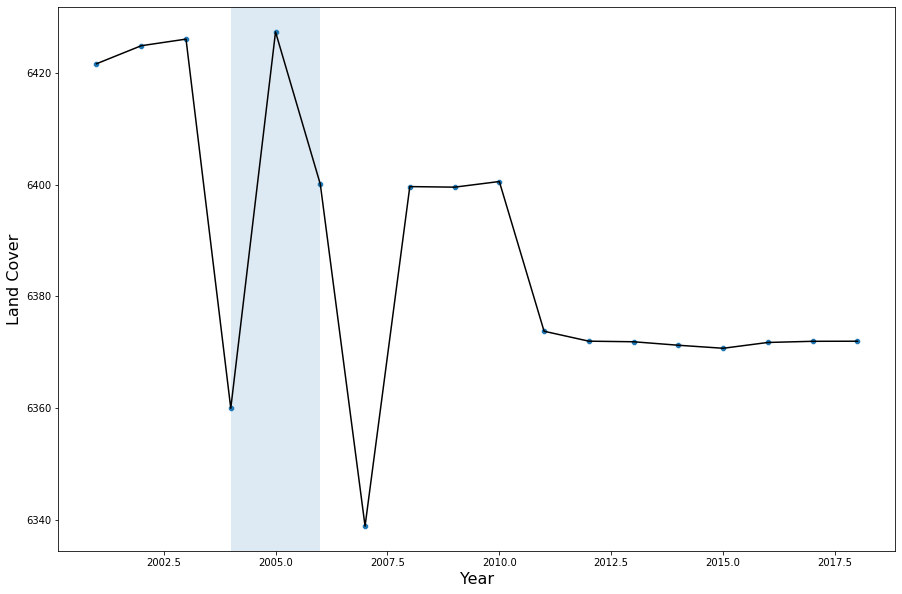

In [13]:
# Check the trend for land_cover yearly
land_cover= land_df.groupby(["Year"])["Value"].mean().reset_index()
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Value',
                     legend='full',
                     data=land_cover,
                     palette=sns.color_palette("Set1", n_colors=len(land_cover.Year.unique())))
max_value_per_year = land_cover.groupby('Year')['Value'].max()
sns.lineplot(data=max_value_per_year,
             ax=ax.axes,
             color='black')
plt.ylabel("Land Cover", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.axvspan(2004, 2006,alpha=0.15) 
plt.show()

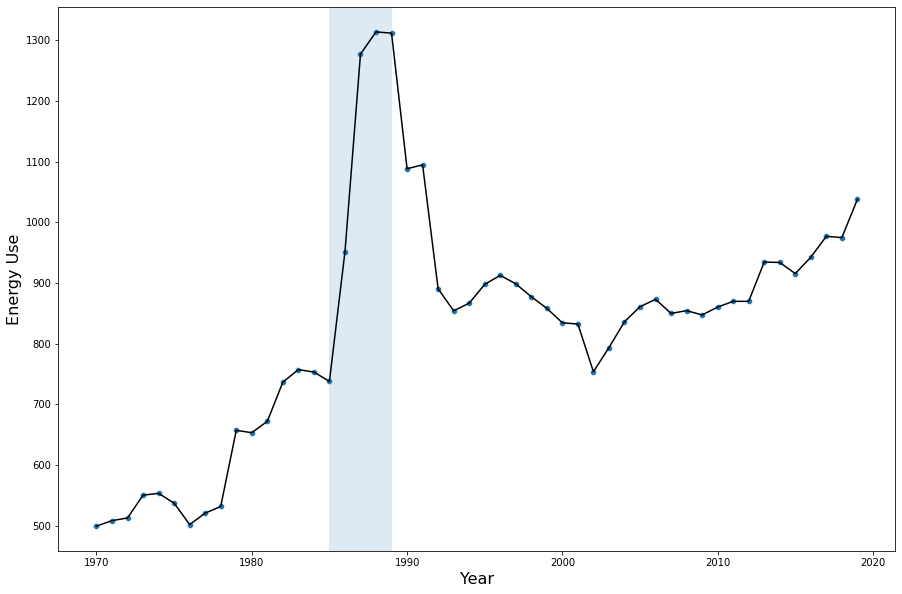

In [14]:
# Check the trend for energy use yearly
energy_use= energy_df.groupby(["Year"])["Value"].mean().reset_index()
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Value',
                     legend='full',
                     data=energy_use,
                     palette=sns.color_palette("Set1", n_colors=len(energy_use.Year.unique())))
max_value_per_year = energy_use.groupby('Year')['Value'].max()
sns.lineplot(data=max_value_per_year,
             ax=ax.axes,
             color='black')
plt.ylabel("Energy Use", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.axvspan(1985, 1989,alpha=0.15) 
plt.show()

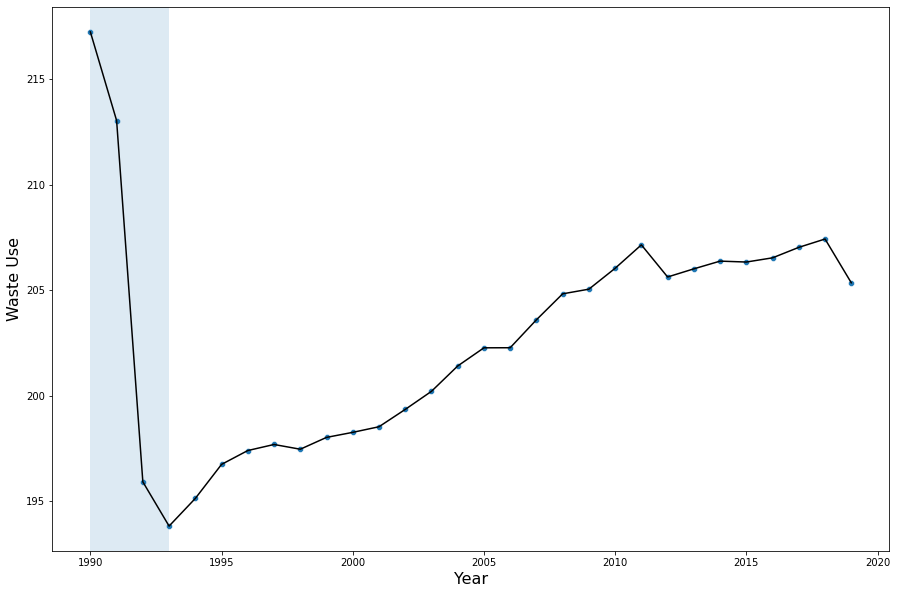

In [15]:
# Check the trend for waste use yearly
waste_use= waste_df.groupby(["Year"])["Value"].mean().reset_index()
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Value',
                     legend='full',
                     data=waste_use,
                     palette=sns.color_palette("Set1", n_colors=len(waste_use.Year.unique())))
max_value_per_year = waste_use.groupby('Year')['Value'].max()
sns.lineplot(data=max_value_per_year,
             ax=ax.axes,
             color='black')
plt.ylabel("Waste Use", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.axvspan(1990, 1993,alpha=0.15) 
plt.show()

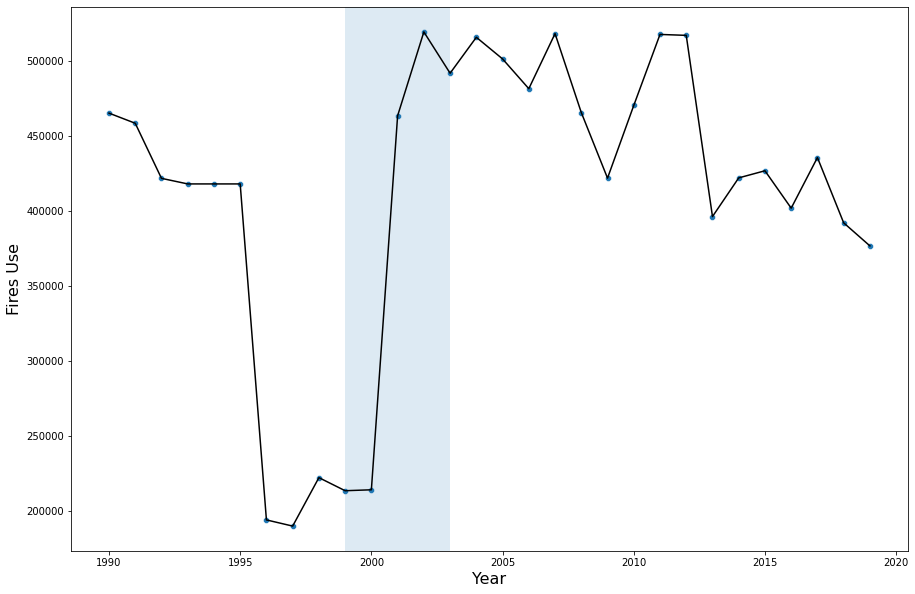

In [16]:
# Check the trend for waste use yearly
fires_use= fires_df.groupby(["Year"])["Value"].mean().reset_index()
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Value',
                     legend='full',
                     data=fires_use,
                     palette=sns.color_palette("Set1", n_colors=len(fires_use.Year.unique())))
max_value_per_year = fires_use.groupby('Year')['Value'].max()
sns.lineplot(data=max_value_per_year,
             ax=ax.axes,
             color='black')
plt.ylabel("Fires Use", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.axvspan(1999, 2003,alpha=0.15) 
plt.show()

## Correlations between the hottest changes and other phenomena (like land coverage, land fires, CO2 emissions and Fires.)

**Insight**<br>
Based on Aggregating the mean per year shows correlation among temperature, energy use, land cover, waste use, and fires. All country-Value indicator(Value feature based on each tables) combinations show an increase, but there are subtle differences:
- In Land cover use, in 2004-2005, there was a signifant increase followed by a slighly increase in from 2011-2017.
- In Energy use, in 1985-1989, there was a signifant increase followed by a slighly increase in from 2019-2020.
- In Waste use, in 1999-1993, there was a signifant drop followed by a significant increase from 1994-2020.
- In Fires use, in 1990-2003, there was a signifant increase followed by a slighly decrease from 2003-2020.

- Almost everywhere, the end-of-year show an correlation that the the temperature that increase yearly affect the use of waste, energy,deforestoration, and land cover yearly.


## How does the seasonal temperature change look like?

In [17]:
df_temperature.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data


In [18]:
df_temperature.groupby("Months")["Value"].agg(["sum","mean","max"])

,sum,mean,max
Months,,,
Dec–Jan–Feb,6113.952,0.467428,8.206
Jun–Jul–Aug,6951.271,0.531890,4.764
Mar–Apr–May,6872.110,0.525511,5.533
Meteorological year,6413.093,0.491651,5.328
Sep–Oct–Nov,5761.315,0.441108,6.084


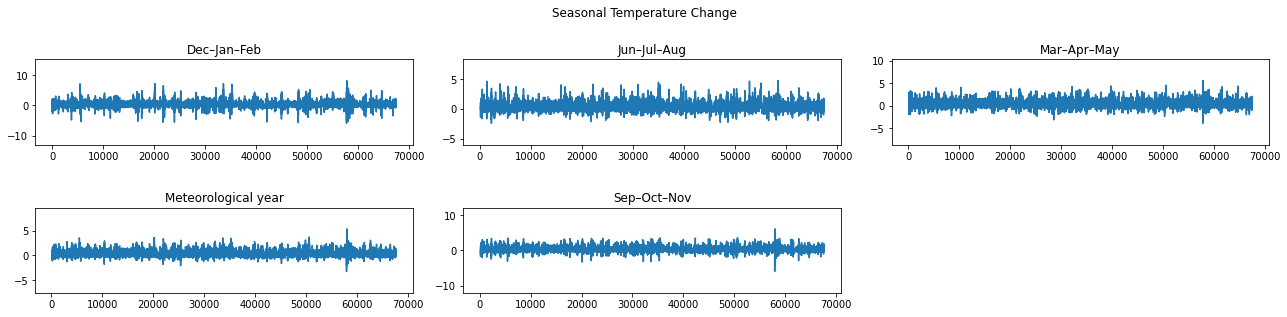

In [19]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(df_temperature.groupby(['Months'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    ax.plot(df.Value)
    ax.set_title(combi)
    #if i == 6: break
plt.tight_layout(h_pad=3.0)
plt.suptitle('Seasonal Temperature Change', y=1.03)
plt.show()

## Seasonal Temperature Change
- We can see that on each month has different maximum temperrature. DEC-Jan-Feb has the hottest temperature with 8.206 followed by Sept-Oct-Nov. 

## How does this vary by continent? Particularly South America?

In [20]:
south_america_countries =['Brazil','Argentina','Chile','Colombia',
                         'Ecuador','Venezuela (Bolivarian Republic of)',
                         'Bolivia (Plurinational State of)','Guyana',
                         'Uruguay','Suriname', 'Paraguay','Aruba','Trinidad and Tobago']


temperature_sa =df_temperature[df_temperature["Area"].isin(south_america_countries)]
temperature_sa.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
2700,ET,Temperature change,ARG,Argentina,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,0.035,Fc,Calculated data
2701,ET,Temperature change,ARG,Argentina,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,-0.144,Fc,Calculated data
2702,ET,Temperature change,ARG,Argentina,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,0.552,Fc,Calculated data
2703,ET,Temperature change,ARG,Argentina,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,0.052,Fc,Calculated data
2704,ET,Temperature change,ARG,Argentina,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.034,Fc,Calculated data


Text(0, 0.5, 'Temperature')

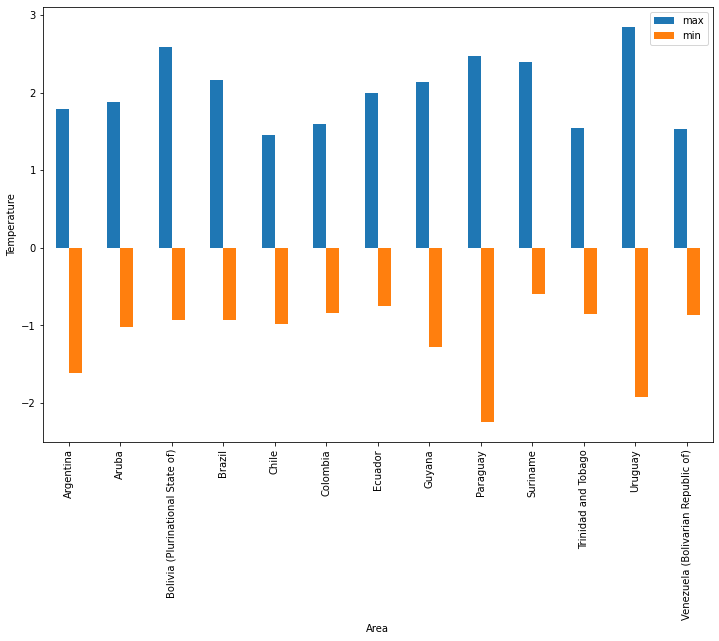

In [21]:
temperature_sa.groupby(["Area"])["Value"].agg(["max","min"]).plot(kind="bar",figsize=(12,8))
plt.ylabel("Temperature")

## How about Meterological season temperature changes in South America?

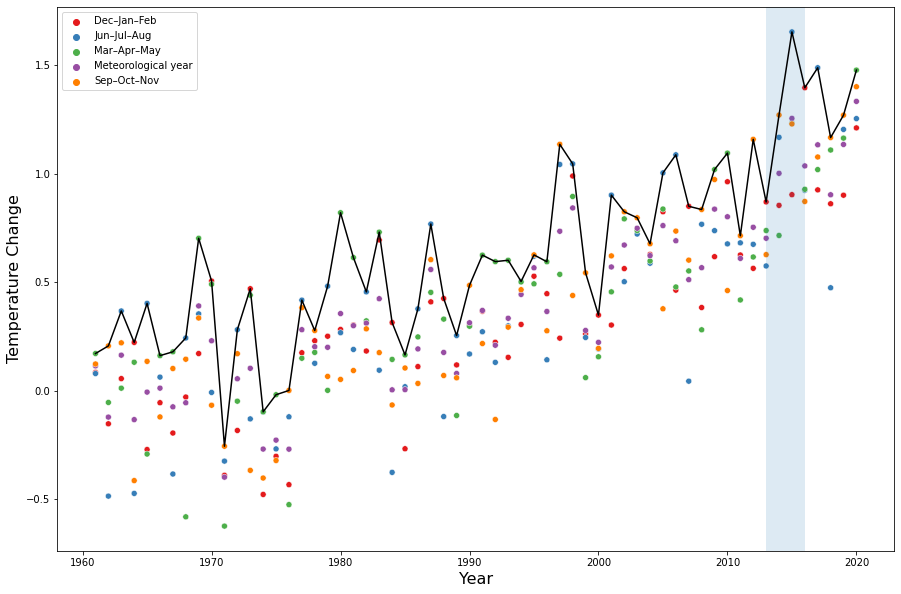

In [22]:
# Check the trend for temperature change yearly
temperature_sa= temperature_sa.groupby(["Year","Months"])["Value"].mean().reset_index()
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='Year',
                     y='Value',
                     legend='full',
                     hue='Months',
                     data=temperature_sa,
                     palette=sns.color_palette("Set1", n_colors=len(temperature_sa.Months.unique())))
max_value_per_year = temperature_sa.groupby('Year')['Value'].max()
sns.lineplot(data=max_value_per_year,
             ax=ax.axes,
             color='black')
plt.ylabel("Temperature Change", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.axvspan(2013, 2016,alpha=0.15) 
plt.show()

- Ultimately, there is an uptrend for temperature change in South America annually in which the peak is around 2013-2016. 

For joining this competition, see [Z-Unlocked_Challenge1](https://www.hp.com/us-en/workstations/industries/data-science/unlocked-challenge.html). There is a chance to visit Barcelona for Kaggle Competition. 